# Shwetasree Chowdhury
# UBID - 50296995

# Project 1

In [285]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import math
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from time import sleep

# Reading Data from the WDBC dataset

Pandas Dataframe is used to read data from the csv file and stored in a variable to be used later

In [286]:
data = pd.read_csv('wdbc.csv',header=None)
'''The seed for the randomness of numpy function is fixed so that when the random function is called 
when the code is run multiple times, each time the shuffling/randomization occurs the same way'''
np.random.seed(seed=1)
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


# Data Preprocessing

Here the first column which corresponds to the IDs is dropped as it is not required in Training

In [287]:
data = data.drop(data.columns[[0]], axis=1)
data

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


Here the labels B and M are changed to 0 and 1 respectively for comparison with predicted outputs

In [288]:
newdata = np.array(data.values)
for i in range(0,len(newdata)):
    if newdata[i][0] == 'B':
        newdata[i][0] = 0
    else:
        newdata[i][0] = 1
newdata = np.array(newdata,dtype=float)
skit = StandardScaler()
newdata

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 0.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

The data percentages are taken for which the original data will be split into training, validation and test set.

In [289]:
TrainingDataPerc = 80
ValidationDataPerc = 10
TestingDataPerc = 10
print("Size of original data with labels:", 
      newdata.shape)

Size of original data with labels: (569, 31)


# Shuffling data to make it Random

The data is shuffled to incorporate randomness in the data

In [290]:
np.random.shuffle(newdata)

# Normalizing Data

The features are normalized to bring their values in similar range so that the logistic regression model can converge easily ang give good results.

# Splitting into Training set

In [291]:
TrainingData_len = int(math.ceil(len(newdata)*(TrainingDataPerc*0.01)))
TrainingLabels = newdatalabels[:TrainingData_len]
TrainingFeatures = newdatafeatures[:TrainingData_len]
print("Training Labels size:",TrainingLabels.shape)
print("Training Features size:",TrainingFeatures.shape)

Training Labels size: (456,)
Training Features size: (456, 30)


# Splitting into Validation set

In [292]:
validationData_len = int(math.floor(len(newdata)*(ValidationDataPerc*0.01)))
vstart = TrainingData_len
vend = vstart + validationData_len
ValidationLabels = newdatalabels[vstart:vend]
ValidationFeatures = newdatafeatures[vstart:vend]
print("Validation Labels size:",ValidationLabels.shape)
print("Validation Features size:",ValidationFeatures.shape)

Validation Labels size: (56,)
Validation Features size: (56, 30)


# Splitting into Test set

In [293]:
testLabels = newdatalabels[vend:]
testFeatures = newdatafeatures[vend:]
print("Validation Labels size:",testLabels.shape)
print("Validation Features size:",testFeatures.shape)

Validation Labels size: (57,)
Validation Features size: (57, 30)


In [294]:
# This value is taken since in calculation of log of a value, sometimes the values can come 0 and hence epsilon is added
# to prevent invalid log calculation
epsilon = 1e-6

def sigmoid(z):
    return 1 / (1 + np.exp(-z.astype(float)))    

'''
This function is used to get the labels for our predicted outputs using the sigmoid function by using a threshold of 0.5
'''
def getLabels(t):
    t[t >= 0.5] = 1
    t[t < 0.5] = 0
    return t

'''
Function to get the predicted output
'''
def getPrediction(x,w,b):
    z = np.dot(w.T, x) + b
    p = sigmoid(z)
    return p

'''
Function to get cost
'''
def calculateCost(x,w,t,b):
    p = getPrediction(x,w,b)
    cost = -np.sum(np.multiply(np.log(p+epsilon), t) + np.multiply((1 - t), np.log(1 - p+epsilon)))/x.shape[1]
    return cost

'''
Function to get the confusion matrix
'''
def invokeConfusionMatrix(l,o):
    ConfusionMatrix= confusion_matrix(l.astype(int),o.astype(int))
    return ConfusionMatrix

'''
Function to get the accuracy using the confusion matrix
'''
def calculateAccuracy(CM):
    tn, fp, fn, tp = CM.ravel()
    Accuracy= (tp+tn)/( tp+tn+fp+fn)
    return Accuracy*100

'''
Function to get the precision using the confusion matrix
'''
def calculatePrecision(CM):
    tn, fp, fn, tp = CM.ravel()
    Precision= tp/(tp+fp)
    return Precision

'''
Function to get the recall using the confusion matrix
'''
def calculateRecall (CMt):
    tn, fp, fn, tp = CM.ravel()
    Recall=tp/(tp+fn)
    return Recall

'''
Here initial weights are taken as randomly generated values and the bias as 0
'''
TrainingFeatures, TrainingLabels = TrainingFeatures.T, TrainingLabels.reshape(1, TrainingLabels.shape[0])
print("Shape of Training Features and Labels after reshaping:",TrainingFeatures.shape,TrainingLabels.shape)
m = TrainingFeatures.shape[1]
w = np.random.randn(TrainingFeatures.shape[0], 1)*0.01                          
print("Initial W matrix: ",w)
print("Shape of W:",w.shape)
b = 0

Shape of Training Features and Labels after reshaping: (30, 456) (1, 456)
Initial W matrix:  [[ 6.54580153e-03]
 [-5.11884476e-04]
 [-7.25597119e-03]
 [-8.67768678e-03]
 [-1.35977326e-03]
 [-7.97269785e-03]
 [ 2.82675712e-03]
 [-8.26097432e-03]
 [ 6.21082701e-03]
 [ 9.56121704e-03]
 [-7.05840507e-03]
 [ 1.19268607e-02]
 [-2.37941936e-03]
 [ 1.15528789e-02]
 [ 4.38166347e-03]
 [ 1.12232832e-02]
 [-9.97019796e-03]
 [-1.06793987e-03]
 [ 1.45142926e-02]
 [-6.18036848e-03]
 [-2.03720123e-02]
 [-1.94258918e-02]
 [-2.50644065e-02]
 [-2.11416392e-02]
 [-4.11639163e-03]
 [ 1.27852808e-02]
 [-4.42229280e-03]
 [ 3.23527354e-03]
 [-1.09991490e-03]
 [ 8.54894544e-05]]
Shape of W: (30, 1)


# Implementing Logistic Regression using Gradient Descent

Here the logistic regression algorithm is implemented and the final weights calculated using the gradient descent method.

In [295]:
epochs = 1000
lr = 0.05
epochlist = [5,10,100,500,1000]
lr_list = [0.01,0.05,0.1,0.5,1,5]
lr_test_acc_list = []
epoch_test_acc_list = []


#for epochs in epochlist:
#    w = np.random.randn(TrainingFeatures.shape[0], 1)*0.01                          
#    b = 0
'''
Lists to store the accuracy and costs for each epoch
'''
trainingcostList = []
trainingaccuracyList = []
validationcostList = []
validationaccuracyList = []

for epoch in range(epochs):
    z = np.dot(w.T, TrainingFeatures) + b
    p = sigmoid(z)   #the predicted output
    dz = p-TrainingLabels
    dw = (1 / m) * np.dot(TrainingFeatures, dz.T)
    db = (1 / m) * np.sum(dz)
    w = w - lr * dw   #updating the weight
    b = b - lr * db   #updating the bias

    #calculating the cost
    cost = -np.sum(np.multiply(np.log(p+epsilon), TrainingLabels) + np.multiply((1 - TrainingLabels), np.log(1 - p + epsilon)))/m
    trainingcostList.append(cost)

    #calculaing the class for the predicted output
    trainingTargetOutput = getLabels(p)
    Training_CM = invokeConfusionMatrix(TrainingLabels.astype(int).reshape(m),
                                        trainingTargetOutput.astype(int).reshape(m))
    trainingaccuracy = calculateAccuracy(Training_CM)
    trainingaccuracyList.append(trainingaccuracy)

    validationPrediction = getPrediction(ValidationFeatures.T,w,b).reshape(len(ValidationFeatures))
    validationTargetOutput = getLabels(validationPrediction)
    validationCost = calculateCost(ValidationFeatures.T,w,ValidationLabels,b)
    validationcostList.append(validationCost)
    Validation_CM = invokeConfusionMatrix(ValidationLabels,validationTargetOutput)
    validationaccuracy = calculateAccuracy(Validation_CM)
    validationaccuracyList.append(validationaccuracy)

print("Final W matrix: ",w)


'''
plt.plot(epochlist, epoch_test_acc_list, label='Test') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Plot of Accuracy vs Epochs for Test set') 
plt.legend(loc='upper right')
plt.savefig('AccuracyVsEpochs.png')
plt.show()
'''

Final W matrix:  [[ 0.53918549]
 [ 0.68142753]
 [ 0.51619045]
 [ 0.54859908]
 [ 0.20704941]
 [-0.00135548]
 [ 0.53534518]
 [ 0.61140727]
 [ 0.06854433]
 [-0.37337172]
 [ 0.63478036]
 [-0.12290726]
 [ 0.48243337]
 [ 0.57300146]
 [ 0.18789004]
 [-0.37066885]
 [-0.09541336]
 [ 0.06800643]
 [-0.12071277]
 [-0.43275657]
 [ 0.70648301]
 [ 0.77738248]
 [ 0.64585595]
 [ 0.68510976]
 [ 0.68074416]
 [ 0.20408467]
 [ 0.53365847]
 [ 0.69301197]
 [ 0.52008824]
 [ 0.14094729]]


"\nplt.plot(epochlist, epoch_test_acc_list, label='Test') \nplt.xlabel('Epochs') \nplt.ylabel('Accuracy') \nplt.title('Plot of Accuracy vs Epochs for Test set') \nplt.legend(loc='upper right')\nplt.savefig('AccuracyVsEpochs.png')\nplt.show()\n"

# Finding the final Accuracy, Precision and Recall using final Weights

In [296]:
trainingPrediction = getPrediction(TrainingFeatures,w,b).reshape(m)
trainingTargetOutput = getLabels(trainingPrediction)
trainingFinalCost = calculateCost(TrainingFeatures,w,TrainingLabels,b)
Training_CM = invokeConfusionMatrix(TrainingLabels.reshape(m),trainingTargetOutput)
trainingFinalAccuracy = calculateAccuracy(Training_CM)
trainingPrecision= calculatePrecision(Training_CM)
trainingRecall= calculateRecall(Training_CM)

validationPrediction = getPrediction(ValidationFeatures.T,w,b).reshape(len(ValidationFeatures))
validationTargetOutput = getLabels(validationPrediction)
validationCost = calculateCost(ValidationFeatures.T,w,ValidationLabels,b)
Validation_CM = invokeConfusionMatrix(ValidationLabels,validationTargetOutput)
validationAccuracy = calculateAccuracy(Validation_CM)
validationPrecision = calculatePrecision(Validation_CM)
validationRecall = calculateRecall(Validation_CM)

testPrediction = getPrediction(testFeatures.T,w,b).reshape(len(testFeatures))
testTargetOutput = getLabels(testPrediction)
testCost = calculateCost(testFeatures.T,w,testLabels,b)
test_CM = invokeConfusionMatrix(testLabels,testTargetOutput)
testAccuracy = calculateAccuracy(test_CM)
testPrecision = calculatePrecision(test_CM)
testRecall = calculateRecall(test_CM)
epoch_test_acc_list.append(testAccuracy)



# Reporting the results

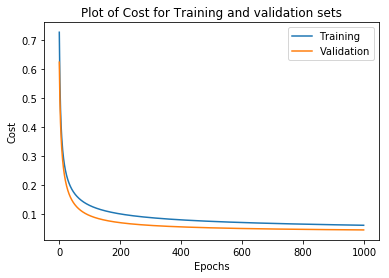

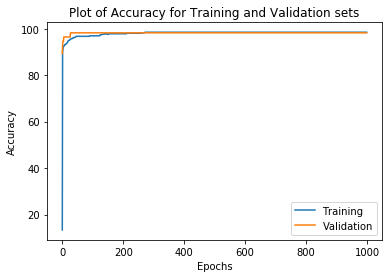

Number of Epochs =  1000
Learning rate =  0.05

-----------------------Training Set----------------------

Confusion Matrix for Training set:
 [[287   2]
 [  5 162]]

Training Accuracy   =  98.46491228070175 %
Training Cost   =  0.06204173853185104
Training Precision   =  0.9878048780487805
Training Recall   =  0.9760479041916168

-----------------------Validation Set--------------------

Confusion Matrix for Validation set:
 [[34  0]
 [ 1 21]]

Validation Accuracy =  98.21428571428571 %
Validation Cost =  0.04602721458805826
Validation Precision   =  1.0
Validation Recall   =  0.9760479041916168

------------------------Test Set-------------------------

Confusion Matrix for Test set:
 [[34  0]
 [ 1 22]]

Testing Accuracy    =  98.24561403508771 %
Testing Cost    =  0.13523821386563847
Test Precision   =  1.0
Test Recall   =  0.9760479041916168


In [297]:
class formatting:
   BOLD = '\033[1m'
   END = '\033[0m'

plt.plot(range(0,epochs), trainingcostList, label='Training') 
plt.plot(range(0,epochs), validationcostList,label='Validation') 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Plot of Cost for Training and validation sets') 
plt.legend(loc='upper right')
#plt.savefig('Cost_lr_'+str(lr)+'_and_epochs_'+str(epochs)+'.png')
plt.show()

plt.plot(range(0,epochs), trainingaccuracyList, label='Training') 
plt.plot(range(0,epochs), validationaccuracyList, label='Validation') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Plot of Accuracy for Training and Validation sets') 
plt.legend(loc='lower right')
#plt.savefig('Accuracy_lr_'+str(lr)+'_and_epochs_'+str(epochs)+'.png')
plt.show()

print("Number of Epochs = ",epochs)
print("Learning rate = ",lr)
print("\n-----------------------Training Set----------------------")
print (formatting.BOLD + "\nConfusion Matrix for Training set:\n",Training_CM)
print(formatting.END)
print ("Training Accuracy   = ", trainingFinalAccuracy,"%")
print ("Training Cost   = ",trainingFinalCost)
print ("Training Precision   = ",trainingPrecision)
print ("Training Recall   = ",trainingRecall)

print("\n-----------------------Validation Set--------------------")
print (formatting.BOLD + "\nConfusion Matrix for Validation set:\n",Validation_CM)
print(formatting.END)
print ("Validation Accuracy = ",validationAccuracy,"%")
print ("Validation Cost = ",validationCost)
print ("Validation Precision   = ",validationPrecision)
print ("Validation Recall   = ",trainingRecall)

print("\n------------------------Test Set-------------------------")
print (formatting.BOLD + "\nConfusion Matrix for Test set:\n",test_CM)
print(formatting.END)
print ("Testing Accuracy    = ",testAccuracy,"%")
print ("Testing Cost    = ",testCost)
print ("Test Precision   = ",testPrecision)
print ("Test Recall   = ",testRecall)